# Python End Term Assignment:

**By: Group 1**

* Goutham Kumar R (D20015)
* Roopini Mohanchander (D20025)

### Libraries

In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import path
#for high resoultion graphs
from IPython.display import set_matplotlib_formats, display
set_matplotlib_formats('svg')  
#widgets for UI
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#for ignoring warnings
import warnings           
warnings.filterwarnings("ignore")    

### Load the dataset:

In [58]:
#change the working directory
os.chdir("C:\\Users\\Goutham-ROG\\Documents\\1-Codes\\Python - codes\\D20 Py- college\\Assignments\\Py end term")
#list the files in the working directory
os.listdir()

['.ipynb_checkpoints',
 'adult-all.csv',
 'attrition_modified.csv',
 'D20015-D20025-PY-ENDTERM.ipynb',
 'Datasets',
 'Graphs',
 'housing.csv',
 'iris.csv',
 'Python End Term Assignment.pdf']

In [59]:
df = pd.read_csv("attrition_modified.csv")
df.head()

,Age,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Attrition
0,41,Travel_Rarely,Sales,Life Sciences,B,Female,C,B,D,Single,5993,Yes,8,A,6,4,0,5,1,Yes
1,49,Travel_Frequently,Research & Development,Life Sciences,C,Male,B,B,B,Married,5130,No,10,C,10,7,1,7,8,No
2,37,Travel_Rarely,Research & Development,Other,D,Male,B,A,C,Single,2090,Yes,7,C,0,0,0,0,2,Yes
3,33,Travel_Frequently,Research & Development,Life Sciences,D,Female,C,A,C,Married,2909,Yes,8,C,8,7,3,0,3,No
4,27,Travel_Rarely,Research & Development,Medical,A,Male,C,A,B,Married,3468,No,6,C,2,2,2,2,2,No


### Spliting catergorical and numerical data

We recommend the user to specify the columns, after reading the data dictonary;<br/>
Because the automatic code will fail, if the categorical data is represented using numbers(for eg. customer_satisfaction: 1 ,2,3).   

In [60]:
#auto splitter
def autosplitter(df):
    """Splits the datafframe into Numerical and Categorical features.
        
        Arguments: df (dataframe)
        
        Retruns: df_num and df_cat (Numerical features and Categorical features)
    """
    df_num = df.select_dtypes(include=[np.number])   #select dtype and include only np.number in this df
    df_cat = df.select_dtypes(exclude=[np.number])   #exclude np.num
    return df_num, df_cat

df_num, df_cat = autosplitter(df)  #fn call
df_cat.head()

,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance,Attrition
0,Travel_Rarely,Sales,Life Sciences,B,Female,C,B,D,Single,Yes,A,Yes
1,Travel_Frequently,Research & Development,Life Sciences,C,Male,B,B,B,Married,No,C,No
2,Travel_Rarely,Research & Development,Other,D,Male,B,A,C,Single,Yes,C,Yes
3,Travel_Frequently,Research & Development,Life Sciences,D,Female,C,A,C,Married,Yes,C,No
4,Travel_Rarely,Research & Development,Medical,A,Male,C,A,B,Married,No,C,No


In [39]:
#Storing the column(features) to a list and displaying it
all_columns = df.columns.to_list()
all_columns

['Age',
 'BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome',
 'Attrition']

In [79]:
#1  #Histogram for Numeical feature
def Histogram(df, outpath = os.getcwd()):
    """Creates Histogram for the numerical variables in the dataset and saves it as .png in the current working directory
        
        arguments: df (dataframe), 
                   outpath = os.getcwd (default =  os.getcwd(), Sets the default path for storing the graphs)
        
        retrun: Histogram graphs for all numerical variables
    """
    df_num, df_cat = autosplitter(df)  #splitting the df into cat and numerical
    for i in df_num:
        min = df_num[i].min()
        max = df_num[i].max()
        print("Graph for %s:\nMinmum value of %s is :%d\nMaximum value of %s is:%d\n\n" %(i,i,min,i,max)) #displaying min and max values
        df_num.hist(column = i) #ploting histogram for every numerical variable
        plt.title('{0}_Histogram'.format(i))  # title
        plt.ylabel("Count of {0}".format(i))  #setting y_label
        plt.xlabel("{0}".format(i))    #setting x_label
        plt.savefig(path.join(outpath,'{0}_Histogram.png'.format(i))) #saving the fig, in respective path
        plt.show()

Graph for Age:
Minmum value of Age is :18
Maximum value of Age is:60




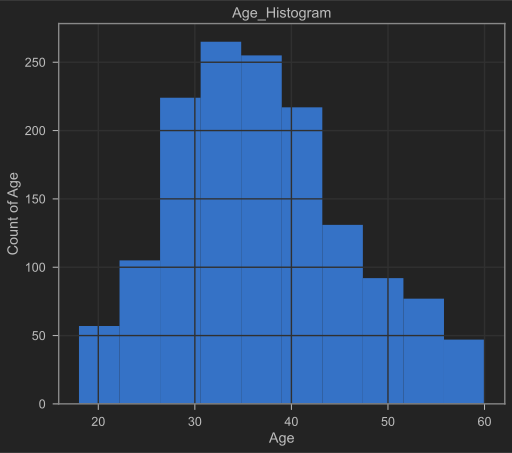

Graph for MonthlyIncome:
Minmum value of MonthlyIncome is :1009
Maximum value of MonthlyIncome is:19999




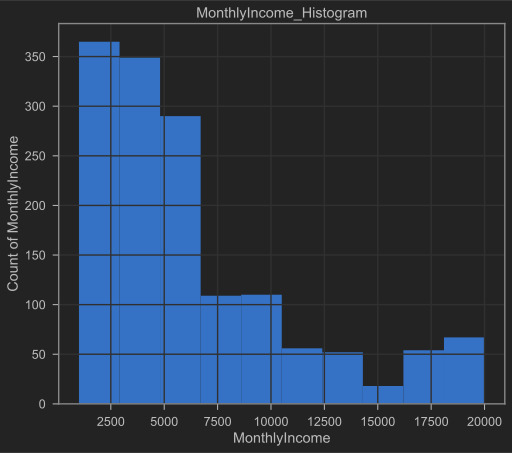

Graph for TotalWorkingYears:
Minmum value of TotalWorkingYears is :0
Maximum value of TotalWorkingYears is:40




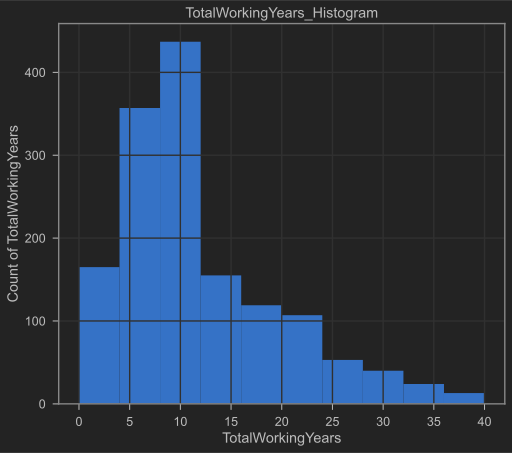

Graph for YearsAtCompany:
Minmum value of YearsAtCompany is :0
Maximum value of YearsAtCompany is:40




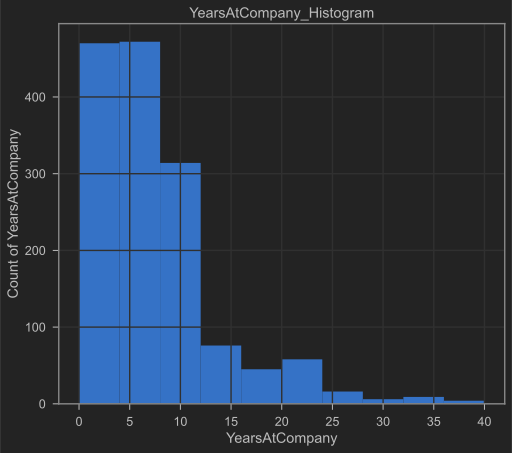

Graph for YearsInCurrentRole:
Minmum value of YearsInCurrentRole is :0
Maximum value of YearsInCurrentRole is:18




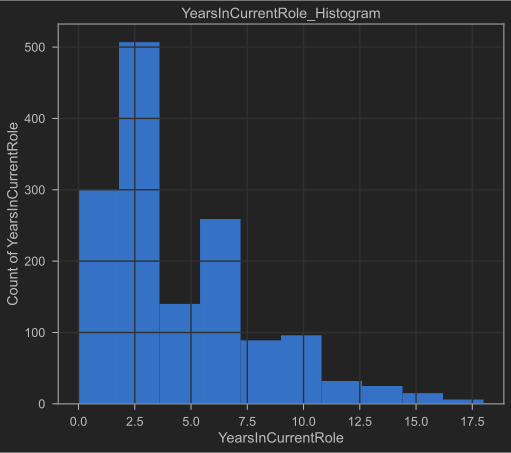

Graph for YearsSinceLastPromotion:
Minmum value of YearsSinceLastPromotion is :0
Maximum value of YearsSinceLastPromotion is:15




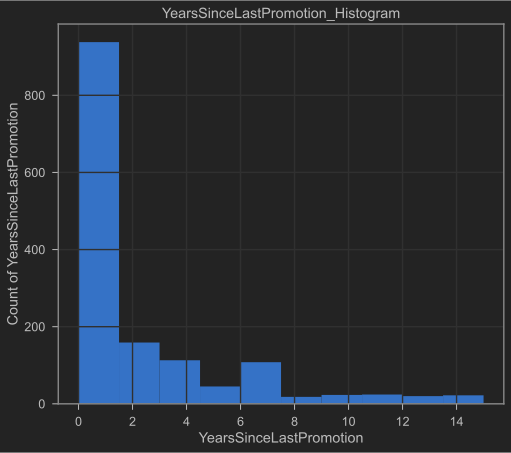

Graph for YearsWithCurrManager:
Minmum value of YearsWithCurrManager is :0
Maximum value of YearsWithCurrManager is:17




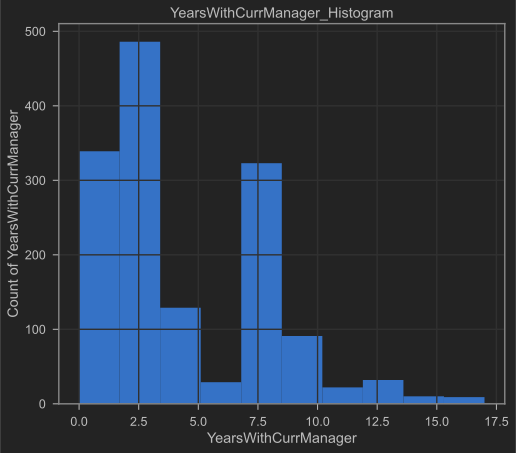

Graph for DistanceFromHome:
Minmum value of DistanceFromHome is :1
Maximum value of DistanceFromHome is:29




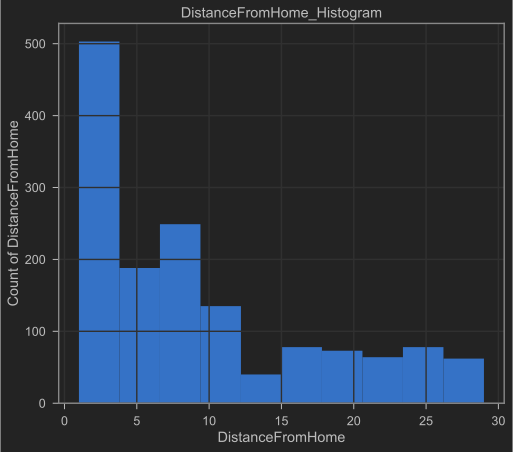

In [81]:
#testing the above fn/fn call
Histogram(df)

In [80]:
#boxplots for outliers analysis
def Boxplot(df, outpath = os.getcwd()):
    """Creates Boxplots for the numerical variables in the dataset
        
        arguments: df (dataframe), 
                   outpath = os.getcwd (default =  os.getcwd(), Sets the default path for storing the graphs)
        
        retrun: Boxplot graphs for all numerical variables
    """
    df_num, df_cat = autosplitter(df)  #splitting the df into catgorical and numerical
    for i in df_num:
        sns.boxplot(x = df_num[i], color='cyan')
        plt.title('{0}_Boxplot'.format(i))  # title
        plt.savefig(path.join(outpath,'{0}_Boxplot.png'.format(i))) #saving the fig, in respective path
        plt.show()
        med = df_num[i].median()    
        Q1 = df_num[i].quantile(0.25)  #quartile Q1 value
        Q3 = df_num[i].quantile(0.75)  #Q3
        IQR = df_num[i].quantile(0.75) - df_num[i].quantile(0.25)  #iqr = q3 -q1
        print("Median value of %s is :%d" %(i,med))
        print("Q1 value of %s is :%d\nQ3 value of %s is :%d\nIQR value of %s is :%d\n\n"%(i,Q1,i,Q3,i,IQR))        

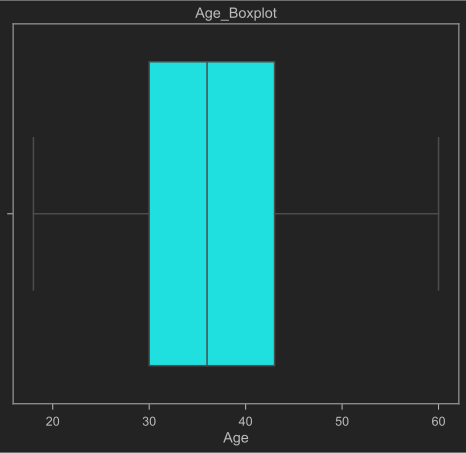

Median value of Age is :36
Q1 value of Age is :30
Q3 value of Age is :43
IQR value of Age is :13




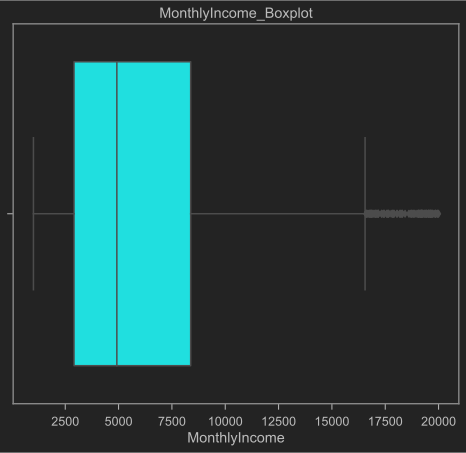

Median value of MonthlyIncome is :4919
Q1 value of MonthlyIncome is :2911
Q3 value of MonthlyIncome is :8379
IQR value of MonthlyIncome is :5468




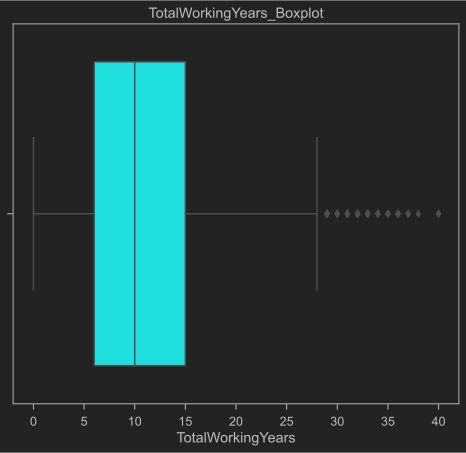

Median value of TotalWorkingYears is :10
Q1 value of TotalWorkingYears is :6
Q3 value of TotalWorkingYears is :15
IQR value of TotalWorkingYears is :9




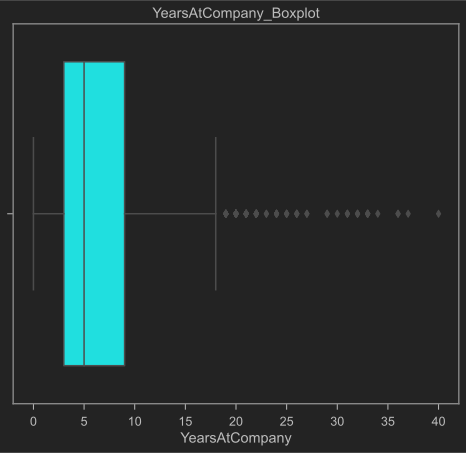

Median value of YearsAtCompany is :5
Q1 value of YearsAtCompany is :3
Q3 value of YearsAtCompany is :9
IQR value of YearsAtCompany is :6




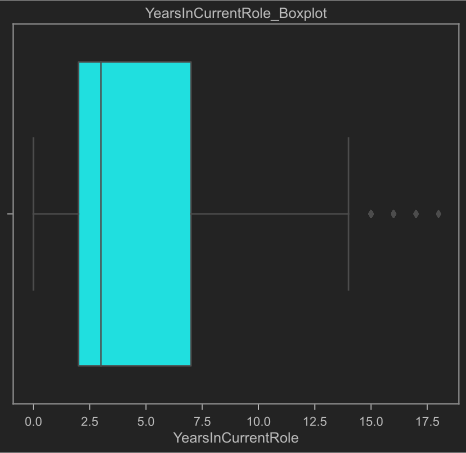

Median value of YearsInCurrentRole is :3
Q1 value of YearsInCurrentRole is :2
Q3 value of YearsInCurrentRole is :7
IQR value of YearsInCurrentRole is :5




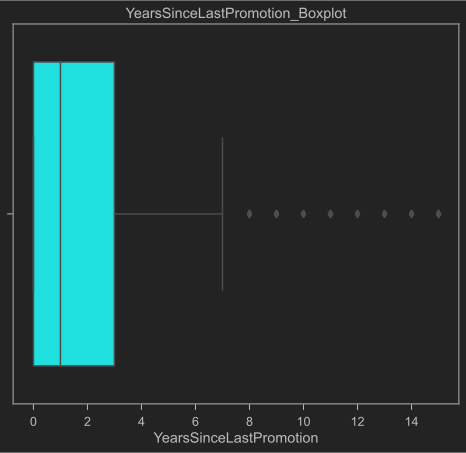

Median value of YearsSinceLastPromotion is :1
Q1 value of YearsSinceLastPromotion is :0
Q3 value of YearsSinceLastPromotion is :3
IQR value of YearsSinceLastPromotion is :3




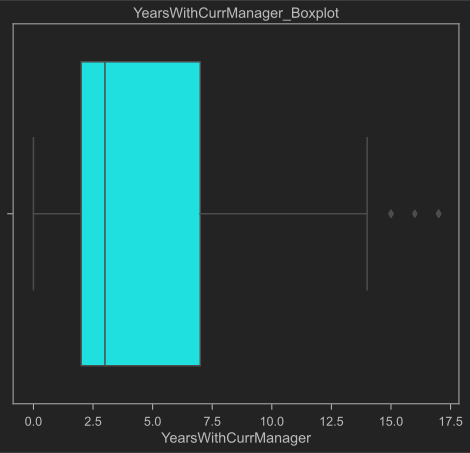

Median value of YearsWithCurrManager is :3
Q1 value of YearsWithCurrManager is :2
Q3 value of YearsWithCurrManager is :7
IQR value of YearsWithCurrManager is :5




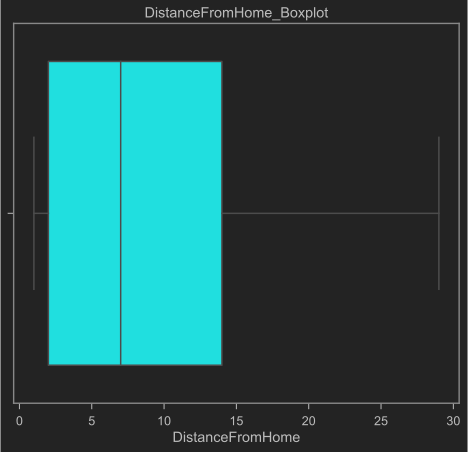

Median value of DistanceFromHome is :7
Q1 value of DistanceFromHome is :2
Q3 value of DistanceFromHome is :14
IQR value of DistanceFromHome is :12




In [83]:
Boxplot(df) #fn call

In [81]:
def Barplots(df, outpath=os.getcwd()):
    """Creates Barplots for the categorical variables in the dataset
        
        arguments: df (dataframe), 
                   outpath = os.getcwd (default =  os.getcwd(), Sets the default path for storing the graphs)
        
        retrun: Barplot graphs for all categorical variables
    """
    df_num, df_cat = autosplitter(df)  #splitting the df into catgorical and numerical
    for i in df_cat:   
        cat_num = df_cat[i].value_counts()   #getting the unquie categories inside the feature
        print("\n\nGraphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
        chart = sns.barplot(x= cat_num.index, y= cat_num, palette="Blues_d")   
        chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)   #rotating labels for better readability
        plt.title('{0}_Barplot'.format(i))  # title
        plt.ylabel("Count of {0}".format(i))
        for bar in chart.patches:  #adding annotation to the graphs 
            chart.annotate(format(bar.get_height(), '.0f'), 
                            (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 5), 
                            textcoords = 'offset points')
        plt.savefig(path.join(outpath,'{0}_Barplot.png'.format(i))) #saving the fig, in respective path
        plt.show()



Graphs for BusinessTravel:
Total_no. of categories:3


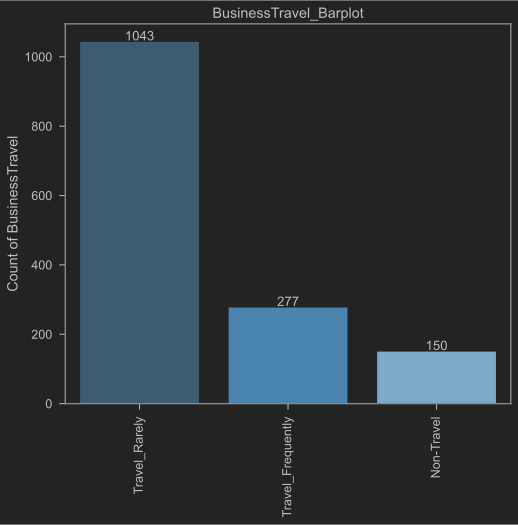



Graphs for Department:
Total_no. of categories:3


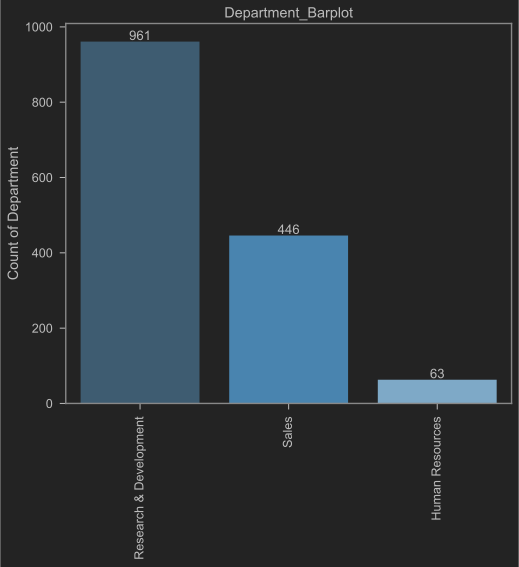



Graphs for EducationField:
Total_no. of categories:6


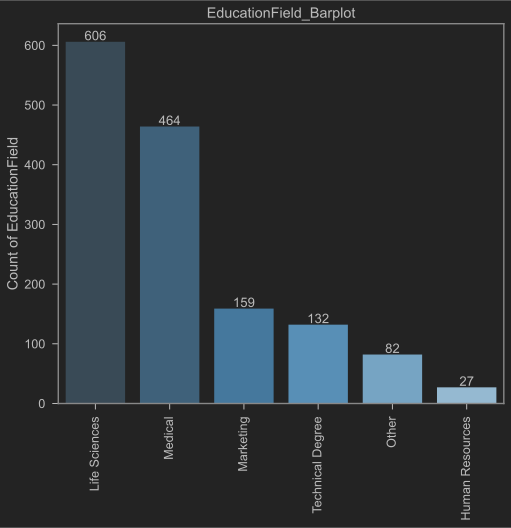



Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


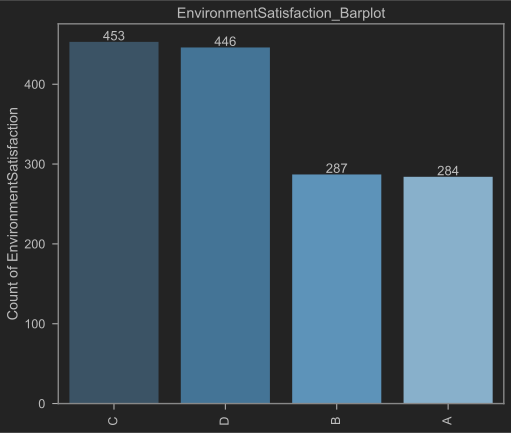



Graphs for Gender:
Total_no. of categories:2


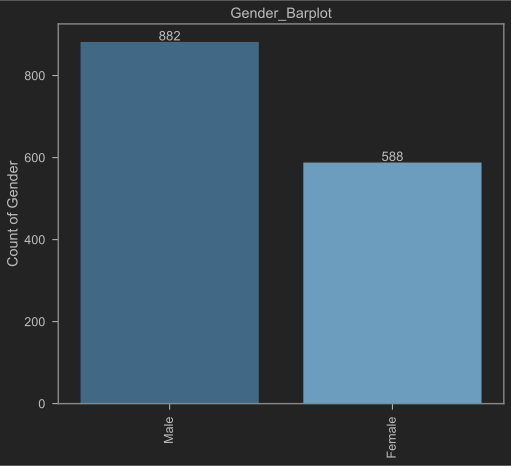



Graphs for JobInvolvement:
Total_no. of categories:4


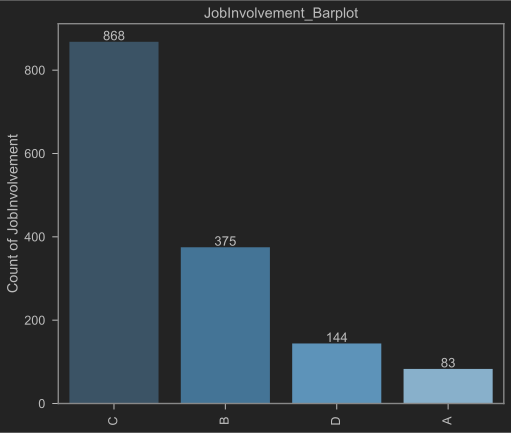



Graphs for JobLevel:
Total_no. of categories:4


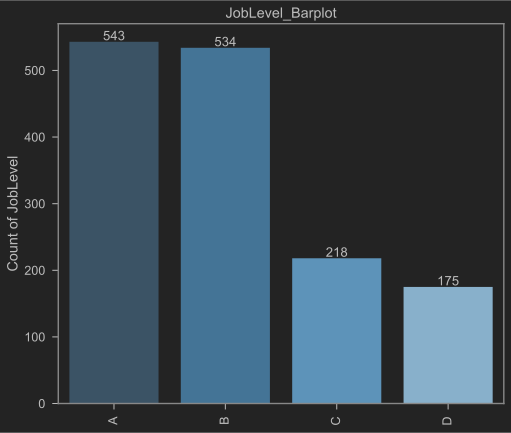



Graphs for JobSatisfaction:
Total_no. of categories:4


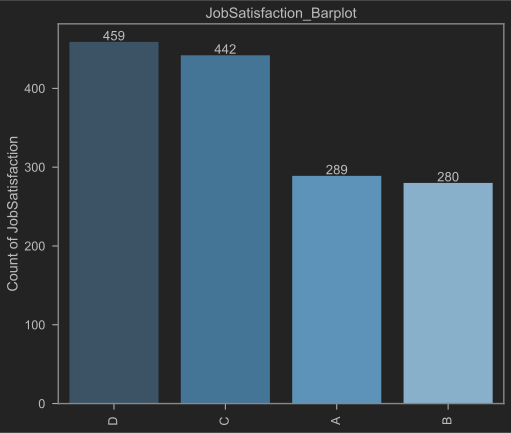



Graphs for MaritalStatus:
Total_no. of categories:3


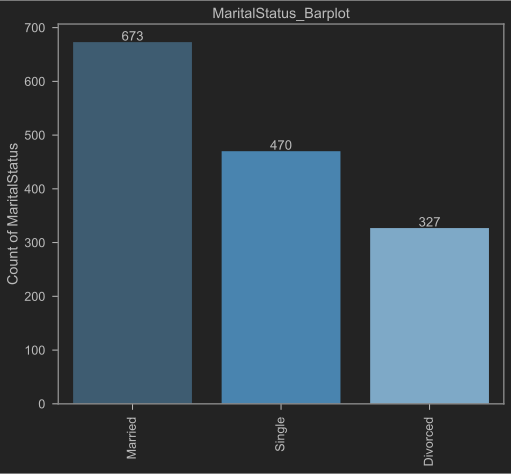



Graphs for OverTime:
Total_no. of categories:2


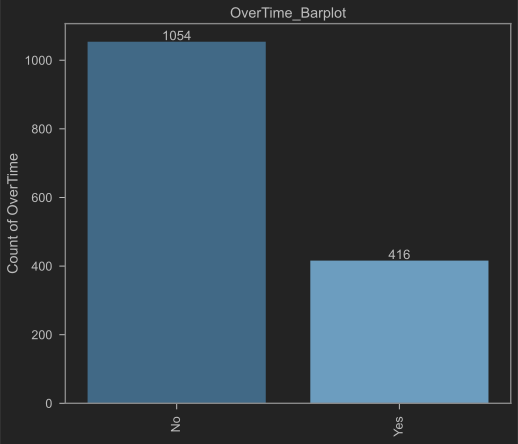



Graphs for WorkLifeBalance:
Total_no. of categories:4


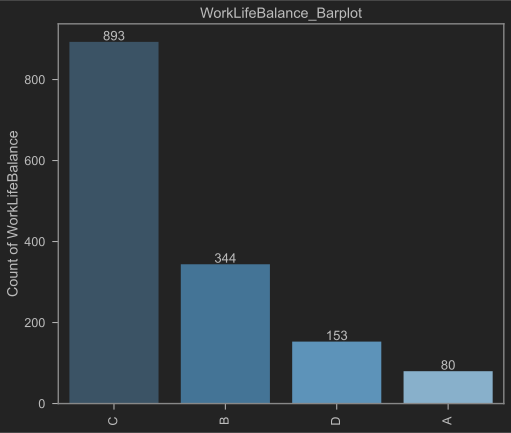



Graphs for Attrition:
Total_no. of categories:2


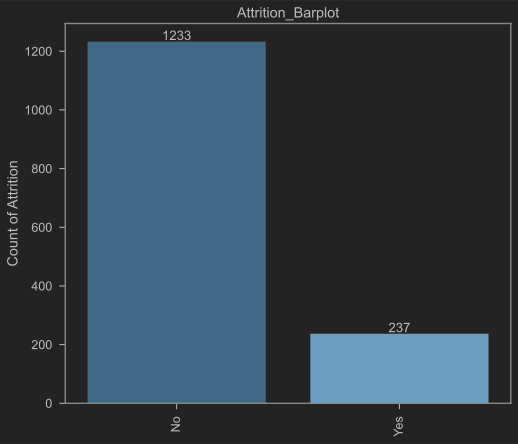

In [85]:
Barplots(df)

In [86]:
#2   #All graphs
def Graphs(df):
    """Generates Graphs for the Numerical and Categorical features present in the dataset.
        Histogram and Boxplot for Numerical Feature
        Barplot for Categorical Feature
        
        Argument: df (dataframe)
        
        Return: Graphs for all the features present in the dataframe.
    """
    outpath = os.getcwd()  #setting the path(current directory) for saving images (if required)
    #for Numerical variables
    print("Histogram for Numerical variables:\n")
    Histogram(df,outpath)
    print('*'*150)
    print("Boxplot for Numerical variables:\n")
    Boxplot(df,outpath)
    print('*'*150)
    #for Categorical variables
    print("Barplot for Categorical variables:\n")
    Barplots(df,outpath)


Histogram for Numerical variables:

Graph for Age:
Minmum value of Age is :18
Maximum value of Age is:60




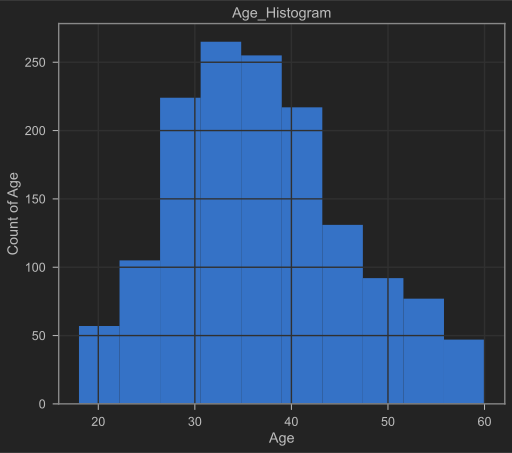

Graph for MonthlyIncome:
Minmum value of MonthlyIncome is :1009
Maximum value of MonthlyIncome is:19999




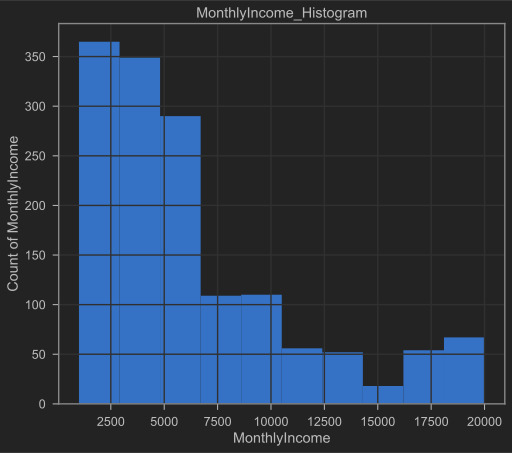

Graph for TotalWorkingYears:
Minmum value of TotalWorkingYears is :0
Maximum value of TotalWorkingYears is:40




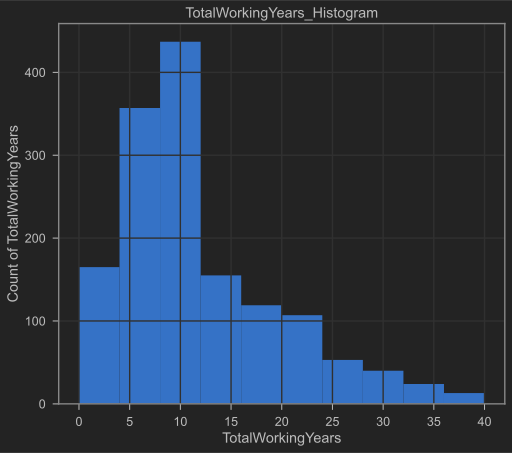

Graph for YearsAtCompany:
Minmum value of YearsAtCompany is :0
Maximum value of YearsAtCompany is:40




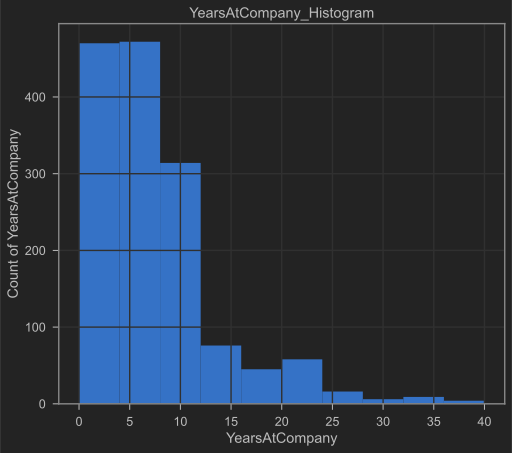

Graph for YearsInCurrentRole:
Minmum value of YearsInCurrentRole is :0
Maximum value of YearsInCurrentRole is:18




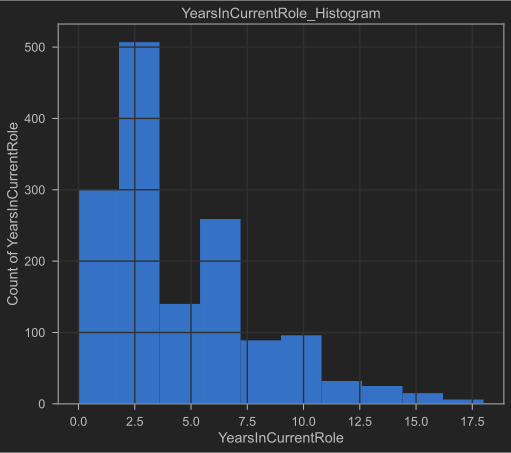

Graph for YearsSinceLastPromotion:
Minmum value of YearsSinceLastPromotion is :0
Maximum value of YearsSinceLastPromotion is:15




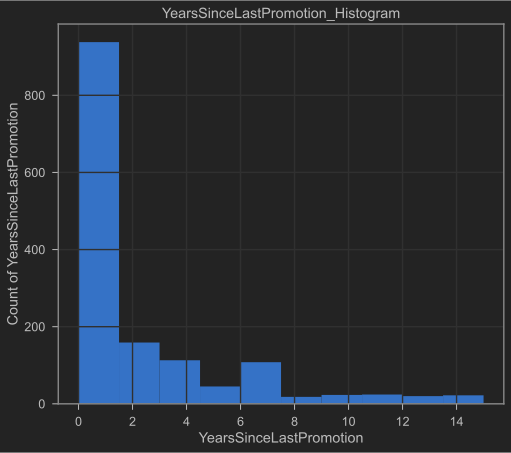

Graph for YearsWithCurrManager:
Minmum value of YearsWithCurrManager is :0
Maximum value of YearsWithCurrManager is:17




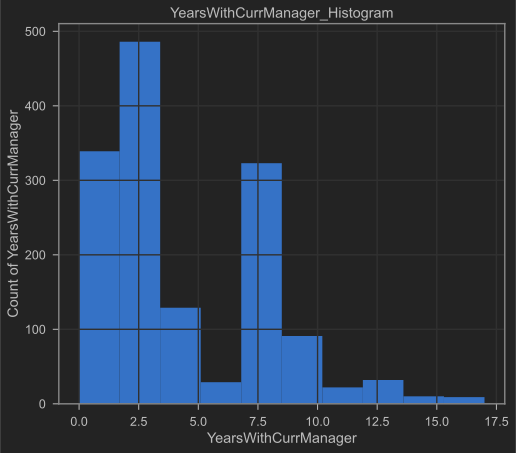

Graph for DistanceFromHome:
Minmum value of DistanceFromHome is :1
Maximum value of DistanceFromHome is:29




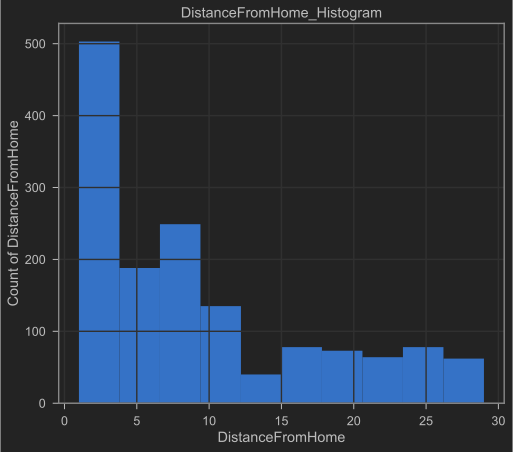

******************************************************************************************************************************************************
Boxplot for Numerical variables:



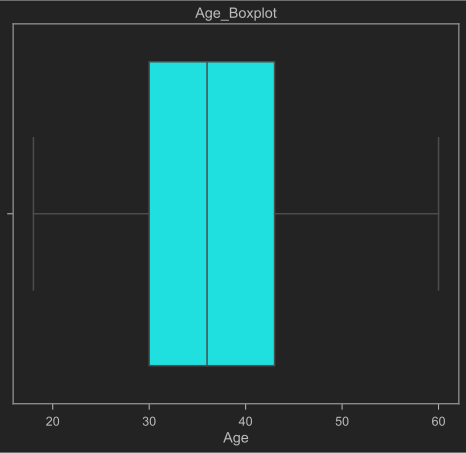

Median value of Age is :36
Q1 value of Age is :30
Q3 value of Age is :43
IQR value of Age is :13




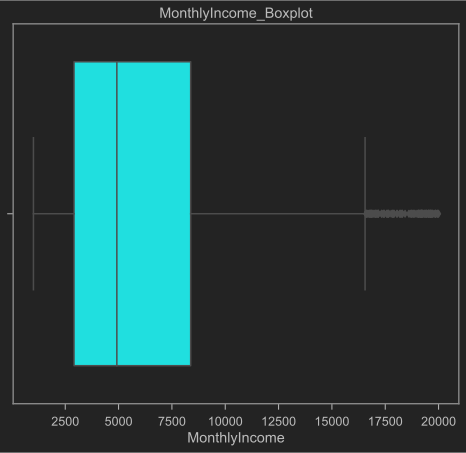

Median value of MonthlyIncome is :4919
Q1 value of MonthlyIncome is :2911
Q3 value of MonthlyIncome is :8379
IQR value of MonthlyIncome is :5468




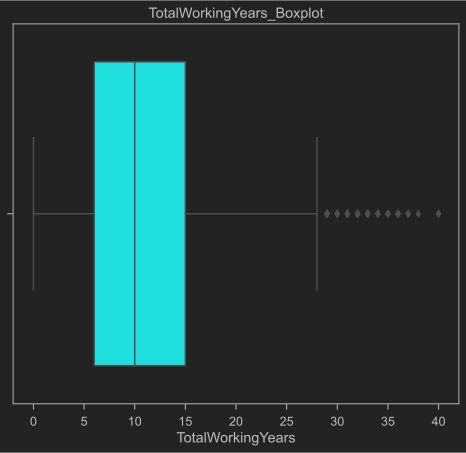

Median value of TotalWorkingYears is :10
Q1 value of TotalWorkingYears is :6
Q3 value of TotalWorkingYears is :15
IQR value of TotalWorkingYears is :9




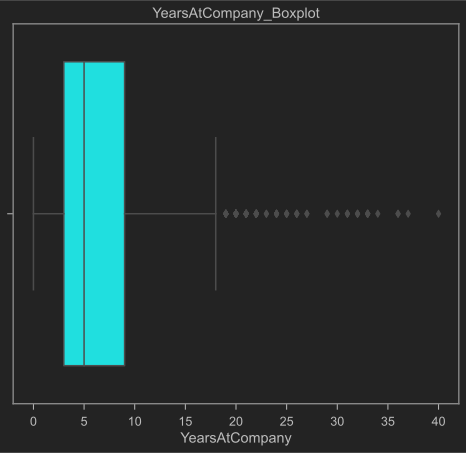

Median value of YearsAtCompany is :5
Q1 value of YearsAtCompany is :3
Q3 value of YearsAtCompany is :9
IQR value of YearsAtCompany is :6




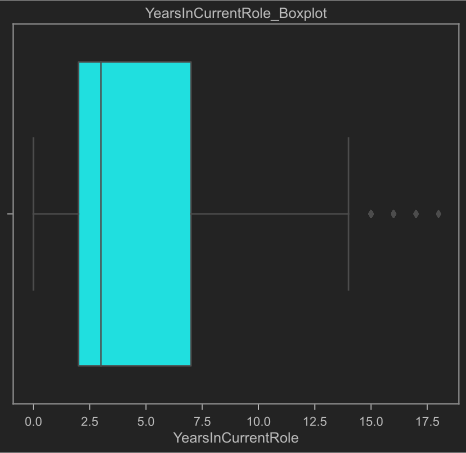

Median value of YearsInCurrentRole is :3
Q1 value of YearsInCurrentRole is :2
Q3 value of YearsInCurrentRole is :7
IQR value of YearsInCurrentRole is :5




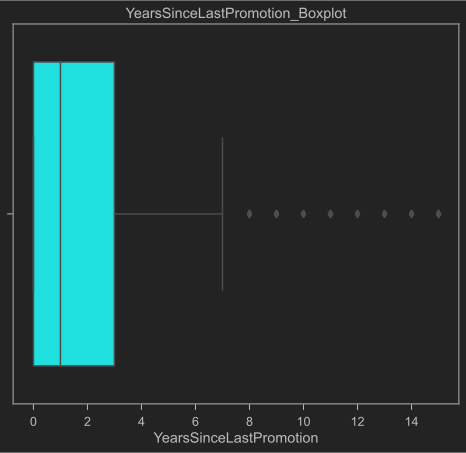

Median value of YearsSinceLastPromotion is :1
Q1 value of YearsSinceLastPromotion is :0
Q3 value of YearsSinceLastPromotion is :3
IQR value of YearsSinceLastPromotion is :3




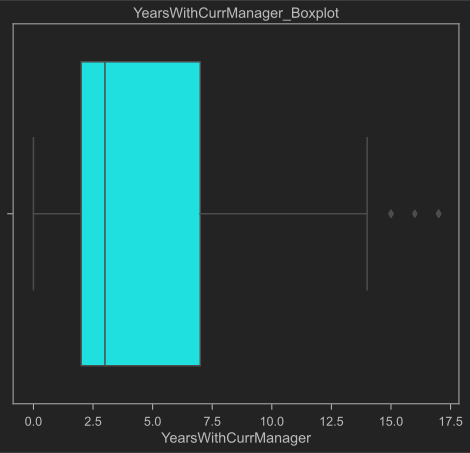

Median value of YearsWithCurrManager is :3
Q1 value of YearsWithCurrManager is :2
Q3 value of YearsWithCurrManager is :7
IQR value of YearsWithCurrManager is :5




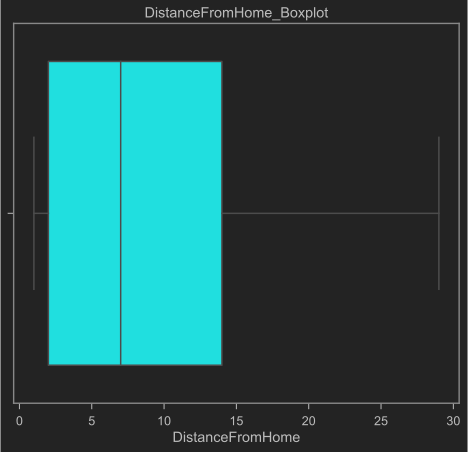

Median value of DistanceFromHome is :7
Q1 value of DistanceFromHome is :2
Q3 value of DistanceFromHome is :14
IQR value of DistanceFromHome is :12


******************************************************************************************************************************************************
Barplot for Categorical variables:



Graphs for BusinessTravel:
Total_no. of categories:3


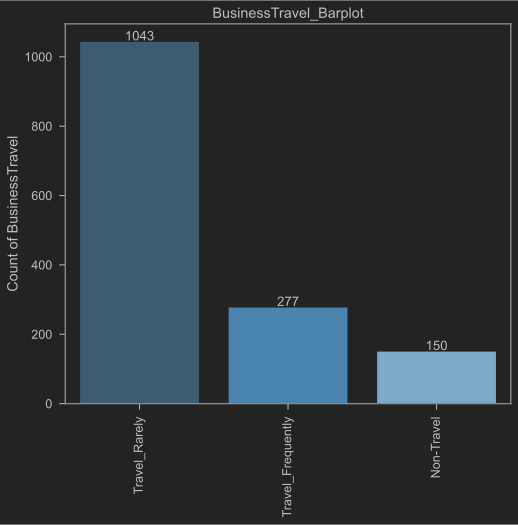



Graphs for Department:
Total_no. of categories:3


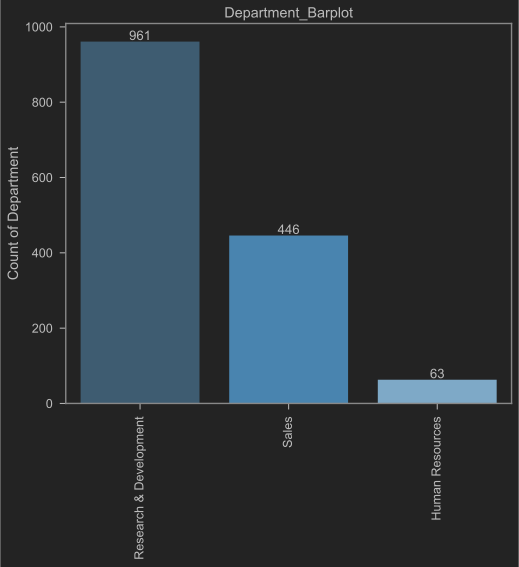



Graphs for EducationField:
Total_no. of categories:6


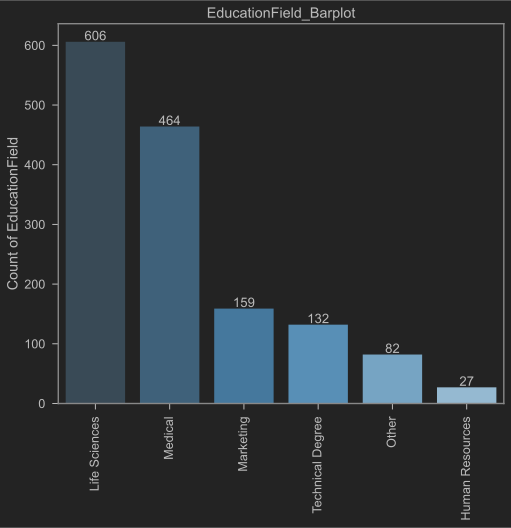



Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


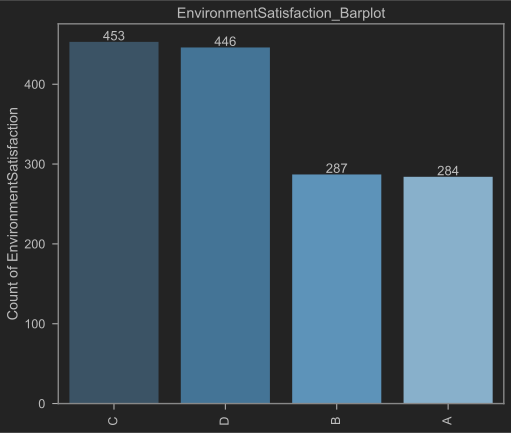



Graphs for Gender:
Total_no. of categories:2


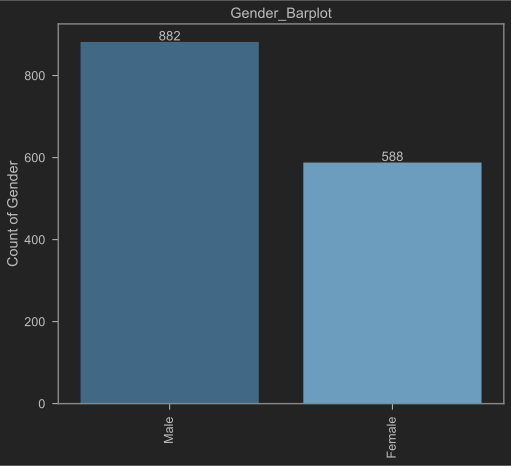



Graphs for JobInvolvement:
Total_no. of categories:4


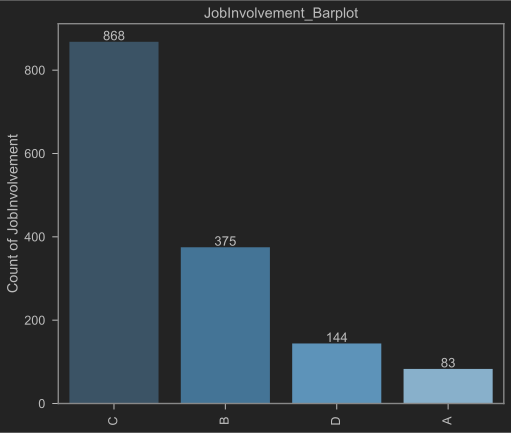



Graphs for JobLevel:
Total_no. of categories:4


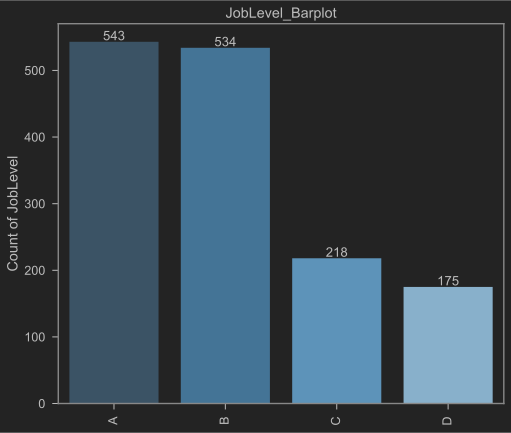



Graphs for JobSatisfaction:
Total_no. of categories:4


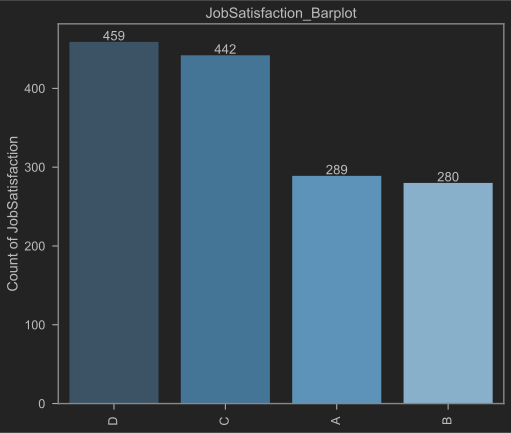



Graphs for MaritalStatus:
Total_no. of categories:3


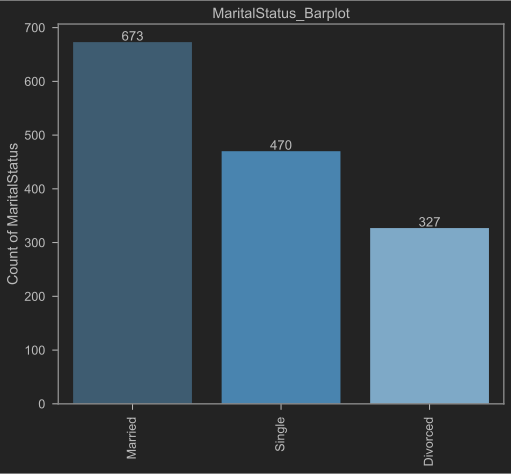



Graphs for OverTime:
Total_no. of categories:2


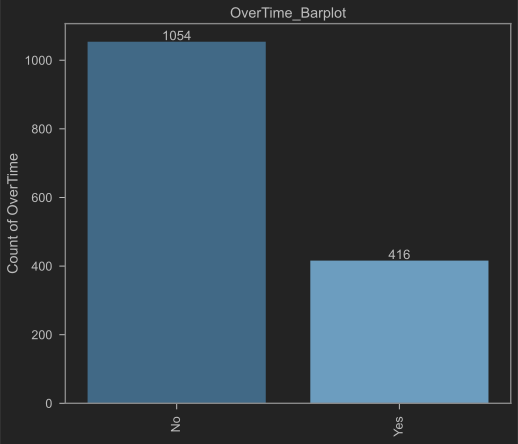



Graphs for WorkLifeBalance:
Total_no. of categories:4


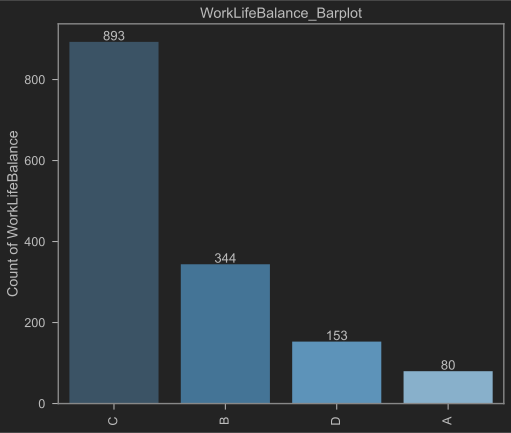



Graphs for Attrition:
Total_no. of categories:2


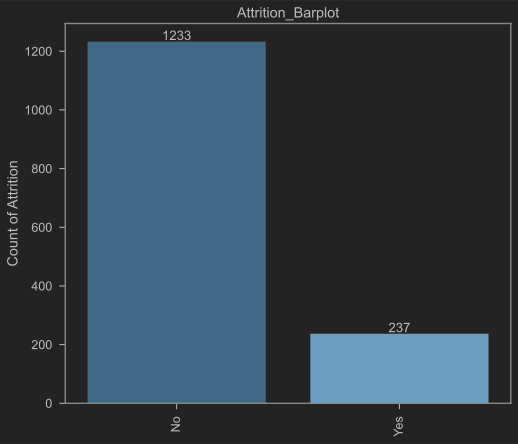

In [87]:
Graphs(df) #fn call

In [100]:
#3       #Graphv2.0
all_columns = df.columns.tolist() #taking all the features to a list.
def Graphs_2(df, subset = False, Variables = all_columns):
    """Generates Graphs for the Numerical and Categorical features present in the dataset.
        Histogram and Boxplot for Numerical Feature
        Barplot for Categorical Feature
        
        Argument: df (dataframe) , 
                  subset = False (default = False, whether the user wishes to subset the dataset)
                  Variables = all_columns  (input type = List of features)
                                  (defalut value = all_columns; if the user does'nt specify the subset, 
                                                  then it takes all features present in the dataset)
        
        Return: Graphs for the features as requested by user in the variables argument.
    """
    if subset == True: #if subset is true
        s = [all_columns[i] for i in Variables]  #subset the values according to the index list(var)
        df = df[s] #subset the df with respective cols. 
    else:
        df = df
    outpath = os.getcwd()  #setting the path(current directory) for saving images (if required)
    #for Numerical variables
    print("Histogram for Numerical variables:\n")
    Histogram(df,outpath)
    print('*'*150)
    print("Boxplot for Numerical variables:\n")
    Boxplot(df,outpath)
    print('*'*150)
    #for Categorical variables
    print("Barplot for Categorical variables:\n")
    Barplots(df,outpath)

Histogram for Numerical variables:

Graph for Age:
Minmum value of Age is :18
Maximum value of Age is:60




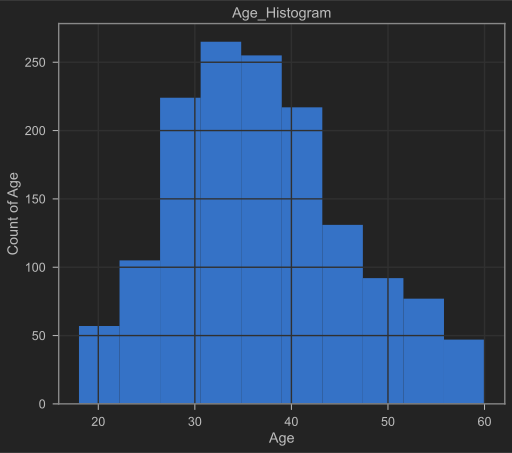

******************************************************************************************************************************************************
Boxplot for Numerical variables:



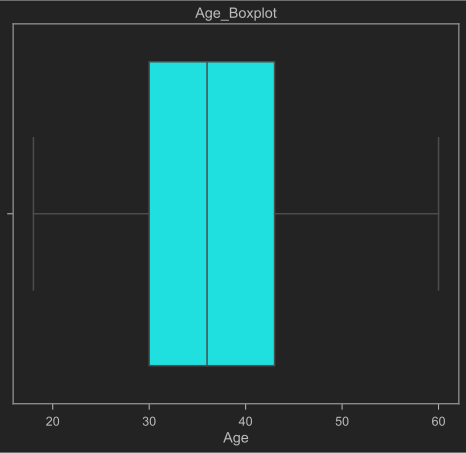

Median value of Age is :36
Q1 value of Age is :30
Q3 value of Age is :43
IQR value of Age is :13


******************************************************************************************************************************************************
Barplot for Categorical variables:



Graphs for Department:
Total_no. of categories:3


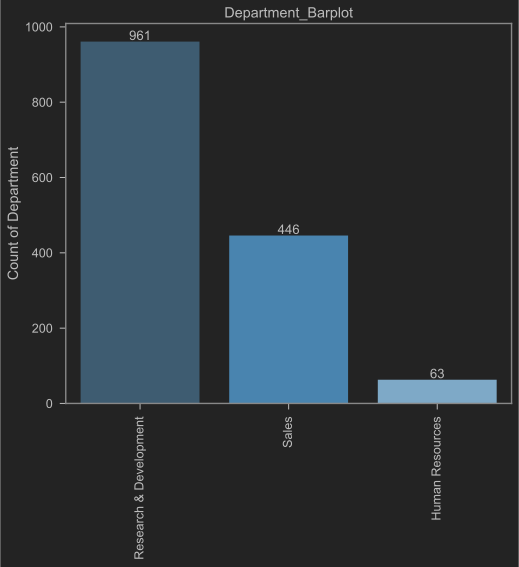



Graphs for EducationField:
Total_no. of categories:6


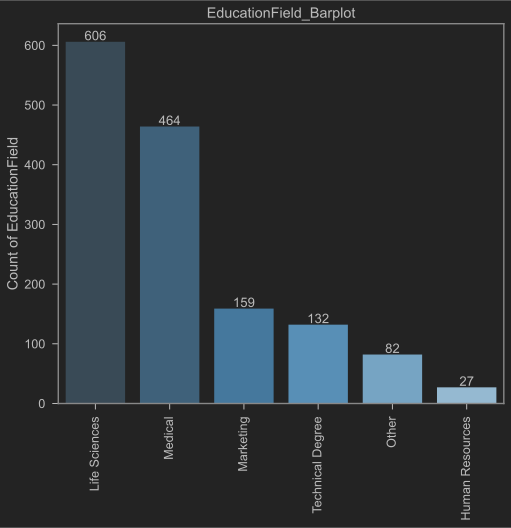

In [101]:
Graphs_2(df, subset=True, Variables=[0,2,3])  #fn call

In [ ]:
#4        #Graphv3.0
all_columns = df.columns.tolist() ##taking all the features to a list.
def Graphs_3(df, subset =False, var = all_columns, path = '../Endterm graphs/'):
    """Generates Graphs for the Numerical and Categorical features present in the dataset.
        Histogram and Boxplot for Numerical Features
        Barplot for Categorical Features
        
        Argument: df (dataframe) , 
                  subset = False (default = False, whether the user wishes to subset the dataset)
                  Variables = all_columns  (input type = List of features)
                                  (defalut value = all_columns; if the user does'nt specify the subset, 
                                                  then it takes all features present in the dataset)
                  path = '../Endterm graphs/' (default path = one directory above the working directory
                                                    User can specify the path where the graphs has to be stored.)
        
        Return: Graphs for the features as requested by user in the variables argument and stored in the specified path.
    """
    if subset == True: #if subset is true
        s = [all_columns[i] for i in var]  #subset the values according to the index list(var)
        df = df[s] #subset the df with respective cols. 
    else:
        df = df   #return full df
        
    outpath = path  #setting the path(current directory) for saving images (if required)
    df_num, df_cat = autosplitter(df)  #splitting the df into catgorical and numerical
    #for Numerical variables
    print("Histogram for Numerical variables:\n")
    Histogram(df_num,outpath)
    print('*'*150)
    print("Boxplot for Numerical variables:\n")
    Boxplot(df_num,outpath)
    print('*'*150)
    #for Categorical variables
    print("Barplot for Categorical variables:\n")
    Barplots(df_cat,outpath)

In [ ]:
Graphs_3(df)#fn call

In [96]:
#5  Additional Features

def Univ(df, outpath=os.getcwd()):
    """ Univariate analysis 
        Generates graphs for all the numerical and the categorical variables present in the dataset 
        Histogram and Boxplot for numerical variables 
        Barplots for categorical variables
        
        Argument: df (dataframe) 
                  outpath = os.getcwd (default =  os.getcwd(), Sets the default path for storing the graphs)
        Returns : Graphs for the features as requested by user and stored in the specified path.           
        """
    df_num, df_cat = autosplitter(df)  #splitting the df into catgorical and numerical
    #for Numerical variables
    print("\nHistogram for Numerical variables:\n")
    Histogram(df_num,outpath)
    print('*'*150)
    print("\nBoxplot for Numerical variables:\n")
    Boxplot(df_num,outpath)
    print('*'*150)
    #for Categorical variables
    print("\nBarplot for Categorical variables:\n")
    Barplots(df_cat,outpath)
 #########################################################################################################   
def Biv(df,outpath=os.getcwd()):
    """ Bivariate analysis 
        Generates graphs for all the numerical and the categorical variables vs target variable in the dataset 
        Correlation heatmap for numerical varaibles
        Multiple Barplots for categorical variables
        
        Argument: df (dataframe) 
                  outpath = os.getcwd (default =  os.getcwd(), Sets the default path for storing the graphs)
        Returns : Graphs for the features as requested by user and stored in the specified path.
    """
    df_num,df_cat = autosplitter(df)  #splitting the df into catgorical and numerical 
    #correlation matrix - numerical data
    print("\nCorreleation Heatmap\n")
    correlation_matrix = df_num.corr()
    plt.figure(figsize=(10,10))
    matrix = np.triu(correlation_matrix)
    sns.heatmap(correlation_matrix,annot=True,mask = matrix,cmap="Blues", vmin=-1,vmax=1,center=0)
    plt.title('Heatmap')  # title
    plt.savefig(path.join(outpath,'Heatmap.png')) #saving the fig, in respective path
    plt.show()
    print("*"*150)
    print("\n\n\n")
    #Multiple bar plots-> to compare the categories in a single feature vs attrition
    print("\nMultiple Barplots for categorical variables\n")
    x_cat = df_cat.iloc[:,:-1]  #split the data into input
    y_cat = df_cat.iloc[:,-1]    #and output elements - Make sure that the target variable is at last index
    for i in x_cat:
        pd.crosstab(x_cat[i], y_cat).plot.bar()   #Multiple bar plot using crosstab
        plt.title('{0}_MultipleBarplot'.format(i))  # title
        plt.ylabel("Count of {0}".format(i))
        plt.savefig(path.join(outpath,'{0}_MutipleBarplot.png'.format(i))) #saving the fig, in respective path
        plt.show()
        print("\n\n\n")
###########################################################################################################
def sts_summary(df):
    """ Statistical Summary of the dataframe
        
        Argument: df (dataframe)
        
        Return: returns the statistical dataframe
    """
    print("\n\nStatistical Summary\n\n")
    df_num,df_cat = autosplitter(df)  #splitting the df into catgorical and numerical
    sts_df = {}
    sts_df['null_sum'] = df_num.isnull().sum()
    sts_df['dtypes'] = df_num.dtypes
    sts_df['count'] = df_num.count()
    sts_df['mean'] = df_num.mean()
    sts_df['median'] = df_num.median()
    sts_df['min'] = df_num.min()
    sts_df['max'] = df_num.max()
    #gives the count of num and cat features
    print("\nCount of Numerical Features:{0}\nNumerical Features are:\n{1}".format(len(df_num.columns),df_num.columns.tolist()))
    print("\nCount of Categorical Features:{0}\nCategorical Features are:\n{1}".format(len(df_cat.columns),df_cat.columns.tolist()))
    
    return pd.DataFrame(sts_df)
################################################################################################################
#4        #Graph_eda
all_columns = df.columns.tolist() ##taking all the features to a list.
def Graphs_eda(df, subset =False, Variables = all_columns, path = '../Endterm graphs/', sts = True):
    """Generates Graphs for the Numerical and Categorical features present in the dataset.
        Histogram and Boxplot for Numerical Feature
        Barplot for Categorical Feature
        
        Argument: df (dataframe) , 
                  subset = False (default = False, whether the user wishes to subset the dataset)
                  Variables = all_columns  (input type = List of features)
                                  (defalut value = all_columns; if the user does'nt specify the subset, 
                                                  then it takes all features present in the dataset)
                  path = '../Endterm graphs/' (default path = one directory above the working directory
                                                    User can specify the path where the graphs has to be stored.)
                  sts = True  (default = True, Gives the Stastiscal summary of the dataset)
        
        Return: Graphs for the features as requested by user in the variables argument and stored in teh specified path.
    """
    print("\n******Welcome to Automated EDA*****\n")
    flag = True
    while flag == True:
        try:
            r = int(input("Please select which analysis would you like to see.\n 1. Univariate \n 2. Bivariate\n"))
        except ValueError:
            print("Please select 1 or 2.")
        else:
            if subset == True: #if subset is true
                s = [all_columns[i] for i in Variables]  #subset the values according to the index list(var)
                df = df[s] #subset the df with rspective cols. 
            else:
                df = df
                
            print("\nStatistical Summary:\n",sts_summary(df))
            outpath = path  #setting the path(current directory) for saving images (if required)
            if r == 1:
                print("\nUnivariate Analysis\n")
                flag = False
                Univ(df,outpath)
            elif r == 2:
                print("\nBivariate Analysis\n")
                flag = False
                Biv(df,outpath)
            else:
                print("Please choose a vaild no. between 1- Univariate and 2 . Bivariate")
                flag = True



******Welcome to Automated EDA*****

Please select which analysis would you like to see.
 1. Univariate 
 2. Bivariate

Please select 1 or 2.
Please select which analysis would you like to see.
 1. Univariate 
 2. Bivariate
2


Statistical Summary



Count of Numerical Features:6
Numerical Features are:
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'For test(low variance) ']

Count of Categorical Features:9
Categorical Features are:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'male', 'native-country', 'yearly-income']

Statistical Summary:
                          null_sum   dtypes  count         mean  median   min  \
age                             0    int64  48853    38.643400    37.0  17.0   
education-num                   0    int64  48853    10.077928    10.0   1.0   
capital-gain                    0    int64  48853  1078.824658     0.0   0.0   
capital-loss                    0    int64  48853    87.524410  

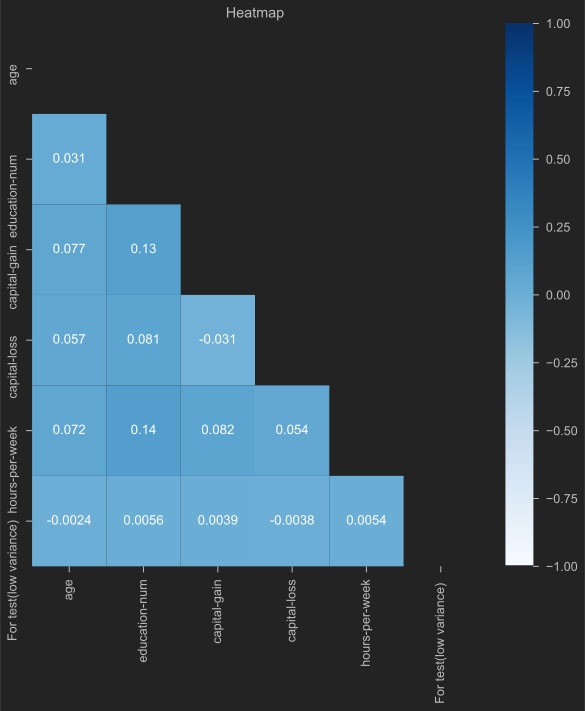

******************************************************************************************************************************************************





Multiple Barplots for categorical variables



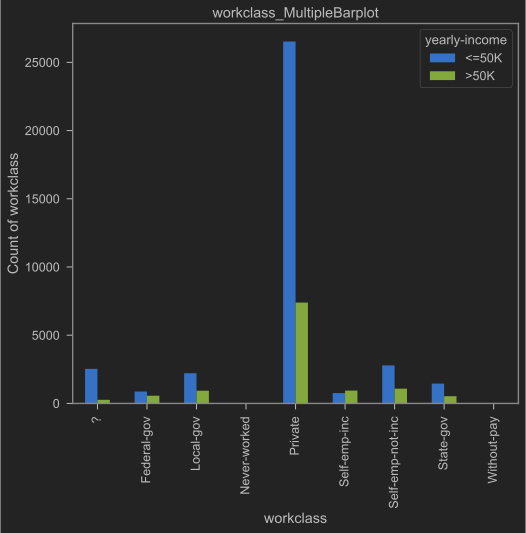

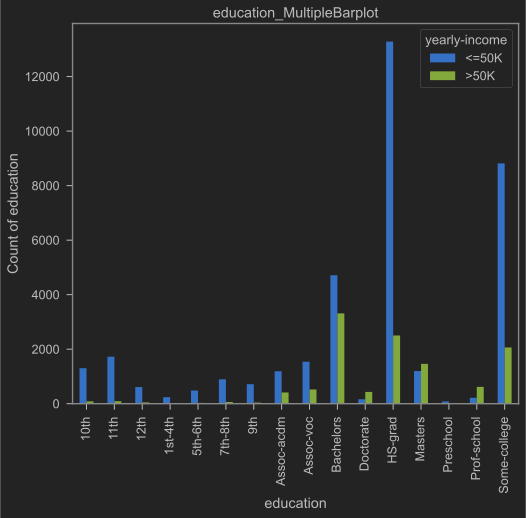

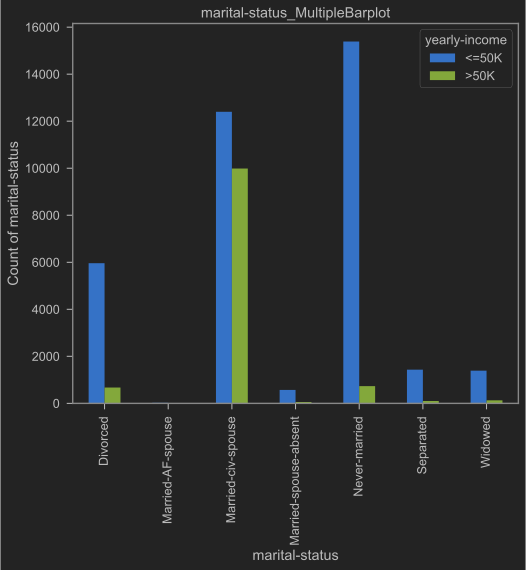

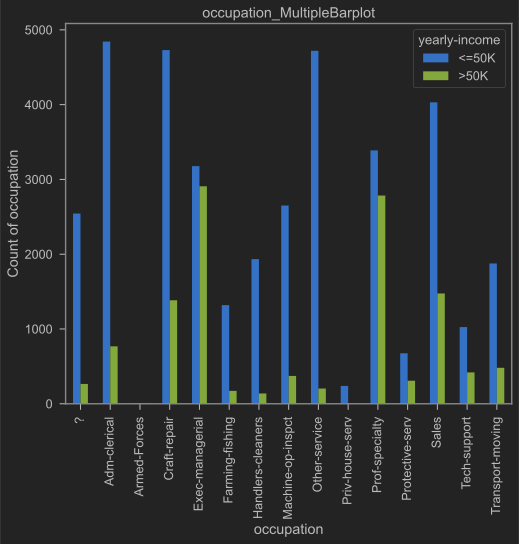

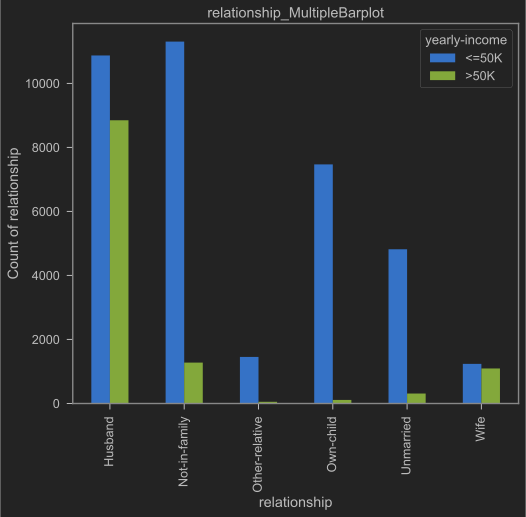

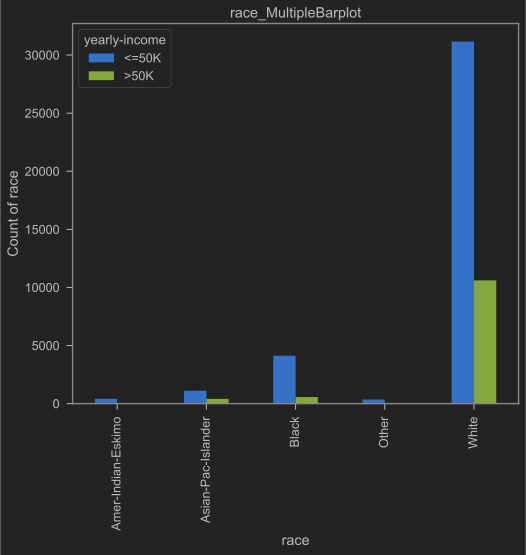

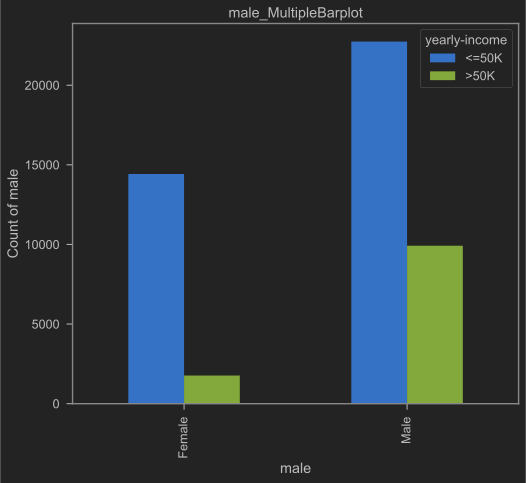

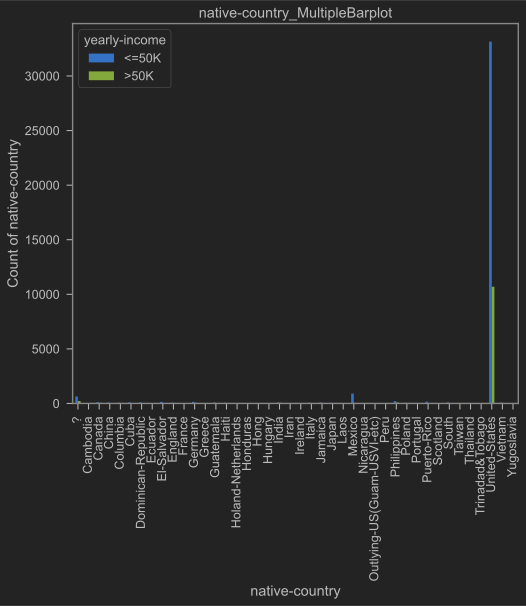

In [97]:
Graphs_eda(df)

### Auto Data Cleaner:

In [61]:
def OutlierRemoval(df):
    """Removes Outlier from the dataset using LOF or iForest
        
        Argument: df (dataframe)
        
        Returns: Updated df (Outlier free dataframe)
    """
    #libraries
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.ensemble import IsolationForest
    #Warning msg
    print("Warning!!\n Great care should be taken not to hastily remove or change values.\n")
    df_num, df_cat = autosplitter(df)  #splitting the df into catgorical and numerical
    #store the data for np operations
    data = df_num.values
    #split the data into input and output elements - Make sure that the target variable is at last index
    X = data[:,:-1]
    y = data[:,-1]
    #summarizing the shape
    print("\Dimensionality of the predictors and target are:\n",X.shape, y.shape)
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
    #summarise the train test shape
    print("Training ds:\n",X_train.shape, X_test.shape,"\nTest ds:\n",y_train.shape, y_test.shape)
    
    
    #User Interaction
    print("\n\nThese are the following automatic outlier detection and removal methods:\n 1. Local Outlier Factor.\n 2. Isolation Forest.")
    print("\n 99. To quit the process.")
    flag = True
    while flag == True:
        try:
            ip = int(input("\nPlease select the method from the above list."))
        except ValueError:
            print("\nPlease choose a interger from above range.")
        else:
            if ip == 1 :   #Local Outlier factor
                flag = False  #flag variable to end the while loop
                print("\nLocal Outlier Factor (LOF):\n")
                #Identify the outliers
                lof = LocalOutlierFactor()
                yhat = lof.fit_predict(X_train)
                #select all rows that are not outliers
                mask = yhat != -1
                X_train , y_train = X_train[mask, :] , y_train[mask]
                #summary of updated traning dataset
                print("Updated training dataset:")
                print(X_train.shape, y_train.shape)

            elif ip == 2:  #
                flag = False  #flag variable to end the while loop
                print("\nIsolation Forest (iForest):\n")
                #Identify the outliers
                iso = IsolationForest(contamination=0.1)  #“contamination” is used to help estimate the no. of outliers in the ds. 
                #This is a value between 0.0 and 0.5 and by default is set to 0.1.
                yhat = iso.fit_predict(X_train)
                #select all rows that are not outliers
                mask = yhat != -1
                X_train , y_train = X_train[mask, :] , y_train[mask]
                #summary of updated traning dataset
                print("Updated training dataset:")
                print(X_train.shape, y_train.shape)
                
            elif ip == 99:  #quit the process
                flag = False #flag variable to end the while loop
                print("\nThe process have been terminated.\n")
                #summarise the train test shape
                print("\nReturning the original Dataset:\n")
                print("Training ds:\n",X_train.shape, X_test.shape,"\nTest ds:\n",y_train.shape, y_test.shape)
            else:
                print("\nPlease choose an integer value from the above range.")
                flag = True  #flag variable to repeat the while loop


In [66]:
#data clean(removing duplicate rows and columns with low variance)

def dclean(df):
    """Data Cleaner
        Options Provided:
            1. Identify and Remove Columns That Have Very Few Values(Low variance)
            2. Identify and Remove the row that contain Duplicate Data
            3. Identify And Remove Missing data
        
        Arguments: df (dataframe)
        
        Returns: Updated dataframe
    """
    print("\nPlease choose which operation to perform.\n 1. Identify and Remove Columns That Have Very Few Values(Low variance). \n 2. Identify and Remove the row that contain Duplicate Data.\n 3. Identify And Remove Missing data\n\n 99. To quit the process ")
    flag = True
    while flag == True:
        try:
            ip = int(input("\nPlease select the method from the above list."))
        except ValueError:
            print("\nPlease choose a interger from range.")
        else:
            if ip == 1:  #Drop Low variance column
                print("\nMark and Remove columns with low variance.\n")
                df_num, df_cat = autosplitter(df)
                t = int(input("Please enter the Variance threshold:"))
                varthreshold = t
                flag = False #flag variable to end the while loop
                print("\nDimensionality of the data:\n", df_num.shape)
                #get unique values
                counts = df_num.nunique()
                #record to delete the low variance col
                to_del =[i for i,v in enumerate(counts) if (float(v)/df_num.shape[0])*100 < varthreshold]    #get columns that have low variance (less than 1% )
                print("The features with low variance are \n",to_del)
                #drop those cols
                df_num = df_num.drop(to_del, axis =1)
                print("Dimensionality of the data after cleaning:\n",df_num.shape)
            
            elif ip == 2:  #Drop duplicate Records
                print("\nMark and Remove duplicate records from the dataset.\n")
                flag = False #flag variable to end the while loop
                #calculate duplicates
                dup = df.duplicated()
                #report if there is any duplicate
                print("Is there any duplicates in my dataset:",dup.any())
                if dup.any() == True:  #remove duplicates only if there are duplicates
                    #list all duplicate rows
                    print("\nThe duplicate rows are: \n", df[dup])
                    #cleaning
                    print("Dimensionality of the original data:\n",df.shape)
                    #delete those records
                    df = df.drop_duplicates()
                    print("Dimensionality of the data after cleaning:\n",df.shape)
                else:
                    print("There are no duplicate rows in the dataset.")
                    
            elif ip == 3:  # Mark and Remove Missing value 
                print("\nMark and remove Missing Values from the dataset.\n")
                flag = False #flag variable to end the while loop
                q = input("\nEnter the characters to be considered as missing value:")
                missing = (df[:] == q).sum()  ##count the no. of missing values foor ecah column
                print(missing)  #printing the missing value counts
                missing.plot(kind='barh',figsize=(7,5), color='Red', fontsize=13)
                plt.title("Missing value plot") #title
                plt.show() #missing value bar graph
                m = input("\nDo you want to remove all the missing values(Complete case):\n Enter (y/n): ")
                if m.lower() == 'y':
                    df[:] = df[:].replace(q,np.nan)  #repalce those missing character with NaN
                    #Remove rows with missing value : complete case
                    print("Dimensionality of the Original data:\n ",df.shape)
                    df2 = df.dropna()   #drop na
                    print("Dimensionality of the data after dropping missing values:\n ",df2.shape)
                elif m.lower() == 'n':
                    print("\nReturning the original Dataset.\n")
                    print("Dimensionality of the original data:\n",df.shape)
                    
            elif ip == 99:  #Quit the process
                flag = False #flag variable to end the while loop
                print("\nThe process have been terminated.\n")
                print("\nReturning the original Dataset.\n")
                print("Dimensionality of the original data:\n",df.shape)
                
            else: 
                print("\nPlease choose an integer value from the above range")
                flag = True  #flag variable to repeat the while loop
    

In [63]:
#main fn
def AutoDataCleaner(df):
    """Auto Data Cleaner contains two functions
        1. Data cleaner 
        2. Outlier Removal
        
        Arguments: df (dataframe)
        
        Rertuns: Updated dataframe
    """
    print("Welcome to Automatic Data cleaner.")
    
    flag = True
    while flag == True:
        try:
            print("\nPlease choose which operation to perform.\n1. Data cleaner \nor\n2. Outlier Removal\n\n 99. To quit the process ")
            ip = int(input("\nPlease select the method from the above list."))
        except ValueError:
            print("\nPlease choose a interger from range.")
        else:
            if ip == 1:
                flag = False  #flag variable to end the while loop
                dclean(df)   #df clean function
            elif ip == 2:
                flag = False      #flag variable to end the while loop
                OutlierRemoval(df)
            elif ip == 99:
                flag = False   #flag variable to end the while loop
                print("Process Terminated")
            else: 
                print("\nPlease choose an integer value from the above range")
                flag = True  #flag variable to repeat the while loop
                
            

In [65]:
AutoDataCleaner(df)

Welcome to Automatic Data cleaner.

Please choose which operation to perform.
1. Data cleaner 
or
2. Outlier Removal

 99. To quit the process 

Please select the method from the above list.2
Warning!!
 1. Great care should be taken not to hastily remove or change values.
\Dimensionality of the predictors and target are:
 (48853, 5) (48853,)
Training ds:
 (32731, 5) (16122, 5) 
Test ds:
 (32731,) (16122,)


These are the following automatic outlier detection and removal methods:
 1. Local Outlier Factor.
 2. Isolation Forest.

 99. To quit the process.

Please select the method from the above list.1

Local Outlier Factor (LOF):

Updated training dataset:
(28612, 5) (28612,)


In [64]:
df = pd.read_csv("adult-all.csv")
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,male,capital-gain,capital-loss,hours-per-week,native-country,For test(low variance),yearly-income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1.1,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1.1,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1.1,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1.1,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1.1,<=50K
